1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

The Standard Deviation measures the spread of data in a dataset. It gives an idea of how much the values in the data spread from the mean of that dataset. The Standard error of the mean is the standard deviation of the sample mean in the sample distribution. It measures how the sample mean spread from sample to sample, where samples are drew from the original data(population). So, standard deviation is how the data is spreading from the sample mean, whereas standard error of the mean is how the sample means is varing from the true population means when a lot of samples are sampled.

2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

First, we need to calculate a confidence interval using the formula and standard error of the mean. Then, the interval we get means that if you took many bootstrap samples and calculated their means, about 95% of those sample means would be in this range and this means they are likely to contain the true population mean.

3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

First, we need to repeat the bootstrapped samples a lot of times to get those sample means. Then we have to sort the means and use the method np.quantile() to find the 2.5th and 97.5th percentiles. The resulting confidence interval will contain the middle 95% of the bootstrapped means.

4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [2]:
import numpy as np

# Create a sample 
sample = np.array([5, 7, 8, 9, 10, 12, 15, 16, 17, 18])

# Number of bootstrap samples to generate
n_bootstraps = 1000

# Set seed for reproducibility
np.random.seed(42)

# Store bootstrapped means
bootstrapped_means = []

# Bootstrap resampling
for _ in range(n_bootstraps):
    # Resample from the original sample with replacement
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    
    # Calculate the statistic of interest (mean in this case)
    bootstrapped_means.append(np.mean(bootstrap_sample))

# Sort the bootstrapped means
bootstrapped_means = np.sort(bootstrapped_means)

# Calculate the 2.5th percentile and 97.5th percentile for 95% confidence interval
lower_bound = np.percentile(bootstrapped_means, 2.5)
upper_bound = np.percentile(bootstrapped_means, 97.5)

# Output the confidence interval
print(f"95% Bootstrap Confidence Interval for the Mean: [{lower_bound}, {upper_bound}]")

# To modify the code to calculate a confidence interval for another parameter, like the median, Instead of appending 
# np.mean(bootstrap_sample) to 'bootstrapped_means', you can append np.median(bootstrap_sample) to get the bootstrapped medians.
# the confidence interval will now reflect the population median.


95% Bootstrap Confidence Interval for the Mean: [9.0, 14.4]


ChatBot history for Question 1-4:
Standard Error of the Mean vs. Standard Deviation: We explored the differences between standard deviation, which measures the variability of individual data points, and the standard error of the mean (SEM), which estimates the precision of the sample mean in relation to the population mean.
Creating a 95% Confidence Interval using SEM: We explained how to use the SEM to construct a 95% confidence interval around the sample mean, emphasizing the relationship between sample means and population means.
Bootstrapped Confidence Interval for Population Mean: We described how to create a 95% confidence interval using bootstrapped sample means, detailing the steps to resample data, calculate means, and determine percentile bounds.
Python Code Example: Finally, I provided a Python code snippet that generates a 95% bootstrapped confidence interval for a population mean based on a made-up sample. The code included comments on how to modify it for different population parameters (such as median) and confidence levels (like 90%).
Link:https://chatgpt.com/share/66fdbc31-4ccc-8004-8a9d-28f85270c3e0

5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

population parameter is the key characteristics of the population, and it's a fixed value. It is usually unknown and is what we are trying to estimate. Sample Statistic are statistics calculated by the samples from the population, it's an estimate of the population parameter. When it comes to confidence intervals, it is a range of values that likely contain the population parameter based on the sample statistic calculated. So we can only use sample statistics to calculate confidence intervals of the data. And confidence intervals gives us the idea of how many samples/intervals that could lie on the true population parameters. 

Chat history for Question 5: We discussed the importance of distinguishing between the population parameter and the sample statistic in the context of confidence intervals. The population parameter is a fixed, usually unknown value that describes the entire population, while the sample statistic is a calculated value from a sample. This distinction is crucial because confidence intervals estimate the likely range of the population parameter based on the sample statistic, accounting for variability and uncertainty. Understanding this difference helps researchers make informed decisions and accurately interpret their results.
Link:https://chatgpt.com/share/66fdc065-d538-8004-8f16-fecf8d4fe7ed

6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

What is the process of bootstrapping?
the process of bootstrapping is repeatedly sampling from the original data or poupulation, with replacement and each time the sample is randomly and independtly selected.

What is the main purpose of bootstrapping?
By bootstrapping a lot of random samples from the population, we can have a sample distribution where all the samples are distributed. Then we can have a confidence interval for the estimate of population parameters.

If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
By bootstrapping, we can have lots of samples generated by randomly sampling and then calculate the sample mean and the confidence interval for the true population mean. Therefore, we can check if the hypothesis mean is within the confidence interval, if it is, then it's plausible.

7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

The null hypothesis can be seen as the true population parameters, and with a confidence interval including zero, it means that zero is a plausible value for the population parameter based on the sample data. So that we cann't reject null hypothesis becasue 0 the true mean can be zero according to the confidence interval. In addition, when the observed sample mean is not zero, the sample may be too small or too noisy, which makes a wider confidence interval that includes zero. 

8. Vaccine Data Analysis Assignment

Analysis of Health Score Improvements Using Bootstrapping:

The objective of this analysis is to check whether there is a significant increase in patients’ health scores between their initial assessment and final assessment. 

Hence, the H0 is there's no difference between the patient's health score, while H1 is there's an increase in patient's health score.

Now, I need to bootstrapp patient's health score(randomly selected with replacement): 

Sample mean of health score differences: 3.3
Bootstrapped 95% confidence interval for the mean difference in health scores: [0.9, 5.6]
The sample mean falls within the confidence interval.


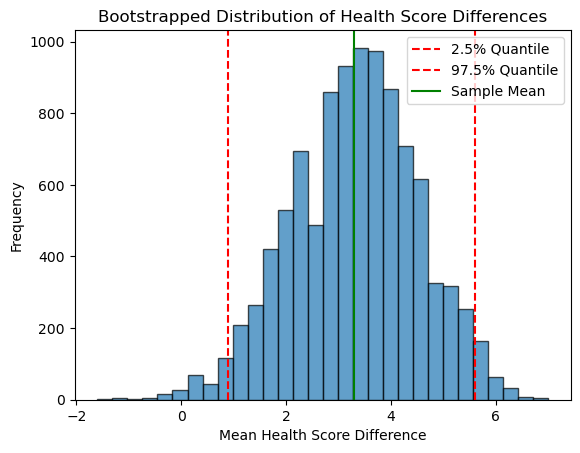

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/AlexZhang109/STA130/refs/heads/main/patient_health_scores.csv"
df = pd.read_csv(url)


df.head()

# Bootstrapping function
def bootstrap_mean(data, n_bootstraps=10000):
    boot_means = []
    n = len(data)
    for _ in range(n_bootstraps):
        sample = np.random.choice(data, size=n, replace=True)
        boot_means.append(np.mean(sample))
    return boot_means

# Calculate the differences between FinalHealthScore and InitialHealthScore
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Calculate the sample mean of the health score differences
sample_mean = df['HealthScoreDifference'].mean()
print(f"Sample mean of health score differences: {sample_mean}")

# Perform bootstrapping on the HealthScoreDifference column
boot_means = bootstrap_mean(df['HealthScoreDifference'], n_bootstraps=10000)

# Calculate confidence intervals (95%)
lower_bound = np.percentile(boot_means, 2.5)
upper_bound = np.percentile(boot_means, 97.5)

# Output the results
print(f"Bootstrapped 95% confidence interval for the mean difference in health scores: [{lower_bound}, {upper_bound}]")

# Check if the sample mean falls within the confidence interval
if lower_bound <= sample_mean <= upper_bound:
    print("The sample mean falls within the confidence interval.")
else:
    print("The sample mean does not fall within the confidence interval.")

# Plot the distribution of bootstrapped means
plt.hist(boot_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(lower_bound, color='r', linestyle='--', label='2.5% Quantile')
plt.axvline(upper_bound, color='r', linestyle='--', label='97.5% Quantile')
plt.axvline(sample_mean, color='g', linestyle='-', label='Sample Mean')
plt.title('Bootstrapped Distribution of Health Score Differences')
plt.xlabel('Mean Health Score Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

By bootstrapping the data 10,000 times, I calculated the 2.5% and 97.5% quantile and get a confidence interval between 0.9 and 5.6. Therefore, becasue interval doesnot contain 0, we reject h0, and this indicates that there's a increase in patient's health score. But if my h0 is there's a significant increase in patient's health score(Ex: Increase more than 2), then this confidence interval would be not sufficient to reject h0, we can't say there's a significent increase in the score. 

In [5]:
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']
mean_difference = df['HealthScoreDifference'].mean()
print(mean_difference)

3.3


If we calculate the true mean(3.3), we can see that the sample mean is exactly the population mean, which it means the estimate of mean is very accurate. However, becasue the population here is too small(less than 30) and I bootstrapped it 10000 times(Basically each sample is repeated a lot of times), this hypothesis test may also be seen as not trustworthy.

Chat history for Question 8: In this session, we discussed bootstrapping in statistics and its application to analyze health score differences between patients. We outlined the process of formulating null and alternative hypotheses, where h0	states there is no difference in health scores, and Ha suggests an increase in scores. We explored how to use bootstrapping to generate confidence intervals and how to interpret them in relation to the sample mean. Specifically, we established that if the confidence interval includes 0, we fail to reject H0 if it does not, we reject h0. While the sample mean provides a point estimate of the effect, the confidence interval is crucial for determining statistical significance. Both the sample mean and confidence interval should be reported for clarity in the analysis.
Link: https://chatgpt.com/share/66fde580-5254-8004-a4c2-32827f10038d